# Problem Set 1, due January 13th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Aamir-PC\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#importing data
flights_df= pd.read_csv('flights.csv')

#viewing the data
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
2,3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
3,4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
4,5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54


* Since Pandas already provides an index, we can remove the redundant column "Unnamed:0".

In [3]:
#deleting the redundant column Unnamed:0

del flights_df["Unnamed: 0"]

In [4]:
#checking new dimensions of the dataframe
flights_df.shape

(336776, 16)

##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [5]:
#calculating the number of flights from JFK to SEA
JFK_flights = flights_df[(flights_df["dest"]=="SEA") & (flights_df["origin"]=="JFK")].count()[["flight"]]

#calculating the number of flights from EWR to SEA
EWR_flights = flights_df[(flights_df["dest"]=="SEA") & (flights_df["origin"]=="EWR")].count()[["flight"]]

#calculating the number of flights from LGA to SEA
LGA_flights = flights_df[(flights_df["dest"]=="SEA") & (flights_df["origin"]=="LGA")].count()[["flight"]]

print("\nTotal no. of flights between SEA & JFK = ",JFK_flights)
print("\nTotal no. of flights between SEA & EWR = ",EWR_flights)
print("\nTotal no. of flights between SEA & LGA = ",LGA_flights)
print("\n\nTotal no. of flights between SEA & NYC = ",LGA_flights + JFK_flights + EWR_flights)

('\nTotal no. of flights between SEA & JFK = ', flight    2092
dtype: int64)
('\nTotal no. of flights between SEA & EWR = ', flight    1831
dtype: int64)
('\nTotal no. of flights between SEA & LGA = ', flight    0
dtype: int64)
('\n\nTotal no. of flights between SEA & NYC = ', flight    3923
dtype: int64)


* Number of flights between SEA & JFK =  2092
* Number of flights between SEA & EWR =  1831
* Number of flights between SEA & LGA =     0

* Total no. of flights between SEA & NYC = 3923


(b) How many airlines fly from NYC to Seattle?

In [6]:
#creating a datafreame of flights between NYC & SEA & storing in NYC_to_SEA_df
NYC_to_SEA_df = flights_df[(flights_df["dest"]=="SEA") #setting destination as SEA
                      & ((flights_df["origin"]=="EWR")#setting origin as JFK, EWR & LGA
                      | (flights_df["origin"]=="JFK")
                      | (flights_df["origin"]=="LGA"))]

#Selecting the carrier information from NYC to SEA & storing in "Airlines"
Airlines = NYC_to_SEA_df[["carrier"]] #extracting the carrier column

#converting into array object
Airlines = np.array(Airlines) 

#displaying
pd.unique(Airlines)

array([('AS',), ('DL',), ('UA',), ('B6',), ('AA',)], dtype=object)

 There are 5 unique airlines that operate between SEA & NYC. The airline codes are as follows -
 
 * AS
 * DL
 * UA
 * B6
 * AA

(c) How many unique air planes fly from NYC to Seattle?

In [7]:
#Selecting the tailnumber information for airplanes from NYC to SEA & storing in "Airplanes"
Airplanes = NYC_to_SEA_df[["tailnum"]] #extracting the tailnum column

#converting into array object
Airplanes = np.array(Airplanes)

#finding the size of the array object
len(pd.unique(Airplanes)) 

936

* There are 936 unique airplanes that operated between NYC & SEA in 2013.

(d) What is the average arrival delay for flights from NC to Seattle?

In [8]:
# Finding the average arrival delay by running the describe() command
NYC_to_SEA_df.describe()["arr_delay"][1]

-1.0990990990990992

The average arrival delay for flights between NYC to SEA is -1.099.

(e) What proportion of flights to Seattle come from each NYC airport?

In [9]:
#proportion from JFK
JFK_flights/(JFK_flights + EWR_flights + LGA_flights)*100

flight    53.326536
dtype: float64

In [10]:
#proportion from EWR
EWR_flights/(JFK_flights + EWR_flights + LGA_flights)*100

flight    46.673464
dtype: float64

In [11]:
#proportion from LGA
LGA_flights/(JFK_flights + EWR_flights + LGA_flights)*100

flight    0
dtype: float64

* Proportion of flights from JFK to SEA is 53.37%
* Proportion of flights from EWR to SEA is 46.63%
* Proportion of flights from LGA to SEA is 0%



In [12]:
#combining the columns year, month & day to form a date
flights_df["date"] = pd.to_datetime(flights_df["year"]*10000
                                    +flights_df["month"]*100
                                    +flights_df["day"],
                                    format='%Y%m%d')

In [13]:
#grouping by date
datewise_flights_df = flights_df.groupby(["date"])

In [14]:
#sorting by mean departurevv delay & displaying the first row
datewise_flights_df["dep_delay"].mean().sort_values(ascending=False).head(1)

date
2013-03-08    83.536921
Name: dep_delay, dtype: float64

In [15]:
#sorting by mean arrival delay & displaying the first row
datewise_flights_df["arr_delay"].mean().sort_values(ascending=False).head(1)

date
2013-03-08    85.862155
Name: arr_delay, dtype: float64

 * 8th March 2013 was the date with the largest average arrival and departure delay. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [16]:
#datewise_flights_df["dep_delay"].max().sort_values(ascending=False).head(1)
flights_df.groupby(["date"]).sum().sort_values(by = "dep_delay", ascending = False).head(1)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
date,,,,,,,,,,,,
2013-03-08,1970727,2937,7832,1131911,66746,1200137,68518,1971253,122690,981487,11080,23911


* 8th March 2013 was the worst day to fly out as it had maximum sum total of departure delay for a given day.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

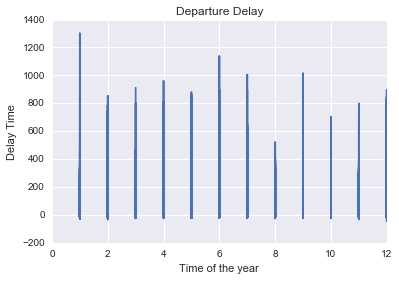

In [17]:
#plotting month on x axis & dep_delay on y axis
plt.plot(flights_df["month"],flights_df["dep_delay"])

#labelling
plt.title("Departure Delay")
plt.xlabel("Time of the year")
plt.ylabel("Delay Time")
plt.show()

The following inferences can be made -

* January had the maximum total delay for the entire year, probably because of bad cold & foggy weather.
* For the following months until May, the departure delay decreases.
* A surge in the delay is seen in the month of June, as summer time is the holiday season & the flights are full.
* November & December also have flight delays because of thanksgiving & new year vacations.

(d) On average, how do departure delays vary over the course of a day?

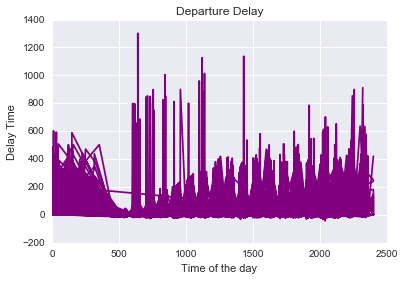

In [18]:
#plotting dep_time on x axis & dep_delay on y axis
plt.plot(flights_df["dep_time"],flights_df["dep_delay"], color = "purple")

#labelling
plt.title("Departure Delay")
plt.xlabel("Time of the day")
plt.ylabel("Delay Time")
plt.show()

The following inferences can be made about flight delays during the day -

* Longer delays are observed from 5 AM until afternoon time. This may be because of the start of the day & many people head to different locations. There is a gradual increase in the flight delay during this time period, evident from the overplotted region between 5 AM & 2 PM.
* After 2 PM, the flight delays show a decreasing trend until the evening time. These are off peak hours, as most people are working.
* After 6 PM & until late night, delays increse again. This may be because people finish their work & head back to their home cities. Some of the longer duration flights depart at the night time.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [19]:
#adding a column for speed
flights_df["speed"] = flights_df["distance"] / flights_df["air_time"]

In [20]:
#defining aggregate function
aggregations = {
    "speed": lambda x: max(x),
}

#grouping flight wise
flightwise_df = flights_df.groupby(["flight","carrier","tailnum","origin","dest","date"], 
                                   as_index = False).agg(aggregations)

#displaying the fastest flight
flightwise_df.sort_values(by="speed", ascending=False).head(1)

,flight,carrier,tailnum,origin,dest,date,speed
168042,1499,DL,N666DN,LGA,ATL,2013-05-25,11.723077


The flight departing NYC which flew the fastest in 2013 -

* Flight DL 1499 from LGA to ATL on 25th May 2013.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [21]:
#grouping the flights_df dataset by carrier, flight & dest & performing the count operation
daily_group=flights_df.groupby(["carrier","flight","dest"], as_index=False).count()

#if the date count is equal to 365 for any group, it means that it flew on all the days of the year 2013
daily_group[daily_group["date"]==365][["carrier","flight","dest"]]

,carrier,flight,dest
767,AA,59,SFO
775,AA,119,LAX
783,AA,181,LAX
904,AA,1357,SJU
914,AA,1611,MIA
1118,B6,219,CLT
1147,B6,359,BUR
1150,B6,371,FLL
1169,B6,431,SRQ
1243,B6,703,SJU


* There are 18 flights that flew everyday in the year 2013. They have been displayed above with the flight details and destinations they fly too.

Logic - 
-Create a grouped dataframe with carrier, flight & destination, set the as_index as False.
-Perform count operation on the group.
-Filter the group for carrier, flight number & destination based on the criteria where the count of date is equal to 365. 
-These flights may even fly more than once in a single day, as the question doesnt specifiy that flight should operate exactly once a day, everyday for the year.



## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


* Research Question : Which is the best airline in terms of speed, departure and arrival delay for the year 2013 ?

* We can create heatmaps in order to explore this research question.

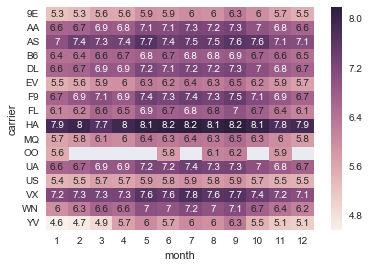

In [22]:
#creating a grouped dataframe by month & carrier
month_carr_df = flights_df.groupby(["month","carrier"],as_index = False).mean()

#creating a speed pivot table
speed_pvt=month_carr_df.pivot("carrier","month","speed")

#creating a heatmap
sns.heatmap(speed_pvt, annot=True)

* We can see from the heatmap that the carrier "HA" has the highest average speed across all months. The carriers "US" & "9E" do not perform well when it comes to speed.

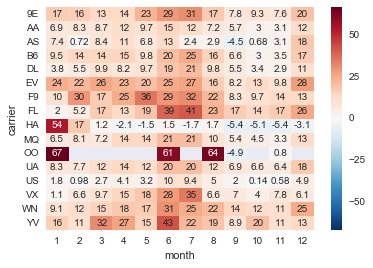

In [23]:
#creating a heat map on dep_delay
dep_pvt=month_carr_df.pivot("carrier","month","dep_delay")

#creating a heatmap
sns.heatmap(dep_pvt, annot=True)

* We can observe that all airlines have some amount of average delay. Carrier "HA" turns out to be best in terms of departure delay, except for the month of January, when it had slightly more than its usual delay. 

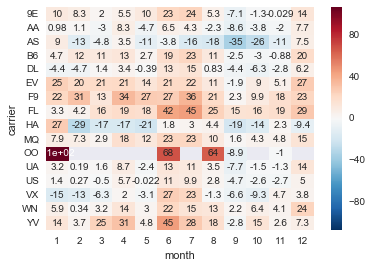

In [24]:
#creating a pivot table on arr_delay
arr_pvt=month_carr_df.pivot("carrier","month","arr_delay")

#creating a heatmap
sns.heatmap(arr_pvt, annot=True)

* We can observe that carrier "F9" & "FL" arrive at their destinations late quite frequently. Carrier "HA" performs well again as it arrives at its destination in advance quite frequently. Carrier "AS" also does well in this respect.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

* We can import the weather data provided with the dataset and merge it with delay columns from the flights data set. After that We can see the correlation of the delays with various weather factors. Based on the correlation values, we can drill in further & examine the finer details.

In [25]:
# importing the weather data
weather_df= pd.read_csv('weather.csv')

In [26]:
#deleting the "Unnamed: 0" column
del weather_df["Unnamed: 0"]

In [27]:
#viewing the data
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013,1,1,0,37.04,21.92,53.97,230,10.35702,11.918651,0,1013.9,10
1,EWR,2013,1,1,1,37.04,21.92,53.97,230,13.80936,15.891535,0,1013.0,10
2,EWR,2013,1,1,2,37.94,21.92,52.09,230,12.65858,14.567241,0,1012.6,10
3,EWR,2013,1,1,3,37.94,23.00,54.51,230,13.80936,15.891535,0,1012.7,10
4,EWR,2013,1,1,4,37.94,24.08,57.04,240,14.96014,17.215830,0,1012.8,10


In [28]:
#grouping by month on mean values and selecting columns
delay_df = flights_df.groupby(["month"] , as_index = False).mean()[["month",
                                                                    "dep_delay",
                                                                    "arr_delay"]]
delay_df.head()

,month,dep_delay,arr_delay
0,1,10.036665,6.129972
1,2,10.816843,5.613019
2,3,13.227076,5.807577
3,4,13.938038,11.176063
4,5,12.986859,3.521509


In [29]:
#grouping by month on mean values and selecting columns
conditions_df = weather_df.groupby(["month"], as_index = False).mean()[["month","temp", "dewp", 
                                                                        "humid", "wind_dir","wind_speed","wind_gust",
                                                                        "precip","pressure","visib"]]
conditions_df.head()

,month,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,35.563176,22.701777,61.948385,214.801097,9.681731,11.141542,0.003634,1021.016794,8.567779
1,2,34.132906,21.705663,62.918152,203.424658,12.183519,14.020550,0.004113,1016.275170,8.615127
2,3,40.043311,24.913136,57.591346,235.247934,11.507800,13.242946,0.002598,1013.457607,9.286003
3,4,52.901000,34.625000,54.403236,169.614286,9.541884,10.980609,0.001472,1020.420916,9.544792
4,5,63.103710,49.001774,63.758589,176.731572,8.298299,9.549517,0.003710,1018.464899,8.964046


In [30]:
#merging the flight & weather conditions data based on month
mean_weather_df = pd.merge(delay_df, conditions_df, on = "month")
mean_weather_df.head()

,month,dep_delay,arr_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,10.036665,6.129972,35.563176,22.701777,61.948385,214.801097,9.681731,11.141542,0.003634,1021.016794,8.567779
1,2,10.816843,5.613019,34.132906,21.705663,62.918152,203.424658,12.183519,14.020550,0.004113,1016.275170,8.615127
2,3,13.227076,5.807577,40.043311,24.913136,57.591346,235.247934,11.507800,13.242946,0.002598,1013.457607,9.286003
3,4,13.938038,11.176063,52.901000,34.625000,54.403236,169.614286,9.541884,10.980609,0.001472,1020.420916,9.544792
4,5,12.986859,3.521509,63.103710,49.001774,63.758589,176.731572,8.298299,9.549517,0.003710,1018.464899,8.964046


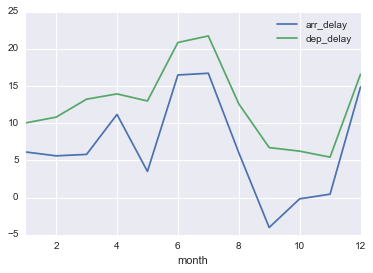

In [31]:
#checking the arrival & departure delay patter for the year
mean_weather_df.plot(x = "month", y =["arr_delay","dep_delay"])

* Since the pattern is very similar, we check the correlation value as well.

In [32]:
#checking correlation
mean_weather_df.corr()["arr_delay"]["dep_delay"]

0.93367550245983544

C:\Users\Aamir-PC\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Aamir-PC\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


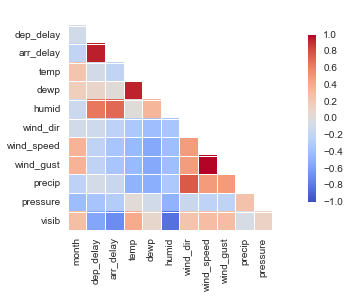

In [33]:
sns.corrplot(mean_weather_df.pct_change(), annot=False, diag_names=False)

* We can see from the correlation matrix that the "dep_delay" & "arr_delay" have some degree of correlation with "humid" and "dewp". Therefore, plotting these datapoints across the year below.

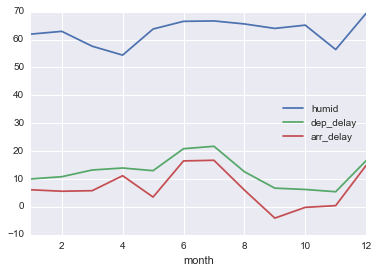

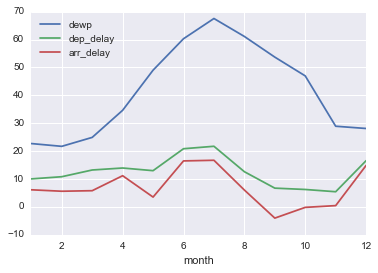

In [34]:
#plotting delay Vs humid & dewp for all months
mean_weather_df.plot(x = "month", y =["humid","dep_delay","arr_delay"])
mean_weather_df.plot(x = "month", y =["dewp","dep_delay","arr_delay"])

* We can see that there is an upsurge in both delays after May up until the beginning of September.
* We can observe a corresponding upsurge during the same time for humidity & dew point. Infact , dew point shows a spike.
* Overall the humidity & dew point tend to follow a similar pattern like that of the delays, which is also evident from the correlation value.